In [507]:
import os
import pandas as pd
from pathlib import Path
import json
from pprint import pprint
from copy import deepcopy
import random
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [64]:
working_path = Path('/home/zhanj289/side_projects/cord_19/')

In [65]:
data_path = Path('/home/zhanj289/side_projects/cord_19/') / 'data'

In [66]:
## PMC JSON looks like having no 'abstract' key

In [67]:
## check meta data

meta_data = pd.read_csv(data_path/'metadata.csv')

In [68]:
meta_data[meta_data['abstract'].isnull()].head()

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id
31,6iu1dtyl,6e8517cb25ff228cb48da90a9c97d9c274dc8031,PMC,The site of origin of the 1918 influenza pande...,10.1186/1479-5876-2-3,PMC340389,14733617.0,no-cc,NaN,2004-01-20,"Barry, John M",J Transl Med,NaN,NaN,NaN,document_parses/pdf_json/6e8517cb25ff228cb48da...,document_parses/pmc_json/PMC340389.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,NaN
35,1769ovyk,c5131e5f5c6000ec84139edc64778a6f1d391b83,PMC,8th Annual Toronto Critical Care Medicine Symp...,10.1186/cc2429,PMC420071,14975048.0,no-cc,NaN,2004-01-02,"Granton, Jeff; Granton, John",Crit Care,NaN,NaN,NaN,document_parses/pdf_json/c5131e5f5c6000ec84139...,document_parses/pmc_json/PMC420071.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4...,NaN
36,tixxm78q,8a7d5de5ea680e784ab2bd877240bf09e4c1c02d,PMC,Recently published papers: all the usual suspe...,10.1186/cc2449,PMC420074,14975037.0,no-cc,NaN,2004-01-02,"Ball, Jonathan",Crit Care,NaN,NaN,NaN,document_parses/pdf_json/8a7d5de5ea680e784ab2b...,document_parses/pmc_json/PMC420074.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4...,NaN
105,r8j6lhoc,c6c8b82bc5a800425b075540eff41b0af719f80f,PMC,HIV Epidemiology in Africa: Weak Variables and...,10.1371/journal.pmed.0020137,PMC1140948,15916469.0,cc-by,NaN,2005-05-31,"Brody, Stuart; Potterat, John J",PLoS Med,NaN,NaN,NaN,document_parses/pdf_json/c6c8b82bc5a800425b075...,document_parses/pmc_json/PMC1140948.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...,NaN
133,az4a70b0,cc698ffabf545da2fd7ee6a5cb4f25d9102a856a,PMC,eCAM benefits from diversity that derives from...,10.1093/ecam/neh120,PMC1193560,16136204.0,no-cc,NaN,2005-09-01,"Cooper, Edwin L.",Evid Based Complement Alternat Med,NaN,NaN,NaN,document_parses/pdf_json/cc698ffabf545da2fd7ee...,document_parses/pmc_json/PMC1193560.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...,NaN


In [69]:

# paper without pdf_json or pmc_json

len(meta_data[(meta_data['pdf_json_files'].isnull()) &(meta_data['pmc_json_files'].isnull()) ])

75786

In [70]:

# paper with pdf_json but no pmc_json

len(meta_data[(meta_data['pdf_json_files'].notnull()) &(meta_data['pmc_json_files'].isnull()) ])

16595

In [71]:

# paper with pmc_json bbut no pdj_json

len(meta_data[(meta_data['pdf_json_files'].isnull()) &(meta_data['pmc_json_files'].notnull()) ])

2819

In [72]:

# paper with pmc_json bbut no pdj_json

len(meta_data[(meta_data['pdf_json_files'].notnull()) &(meta_data['pmc_json_files'].notnull()) ])

45332

In [73]:
# paper has no abstract in metadata
meta_data_no_abstract  = meta_data[meta_data['abstract'].isnull()]

In [74]:
len(meta_data_no_abstract)

30914

In [75]:

# paper without pdf_json or pmc_json

len(meta_data_no_abstract[(meta_data_no_abstract['pdf_json_files'].isnull()) &(meta_data_no_abstract['pmc_json_files'].isnull()) ])

20142

In [76]:
## look closely at a paper without abstract bbut has pdf_json

meta_data_no_abstract[(meta_data_no_abstract['pdf_json_files'].notnull()) &(meta_data_no_abstract['pmc_json_files'].isnull()) ]['pdf_json_files'][224]

'document_parses/pdf_json/a037a1a6fe76f1c43e33a639231b9874cb655f88.json'

In [ ]:
# but it has abstraxt in json

In [67]:
test_file = json.load(open('data/document_parses/pdf_json/a037a1a6fe76f1c43e33a639231b9874cb655f88.json', 'rb'))

test_file['abstract']

### metadata seems cannot reflect whether we have abstract in the dataset

In [77]:
# The following function is used in creating
def format_name(author):
    middle_name = " ".join(author['middle'])
    
    if author['middle']:
        return " ".join([author['first'], middle_name, author['last']])
    else:
        return " ".join([author['first'], author['last']])


def format_affiliation(affiliation):
    text = []
    location = affiliation.get('location')
    if location:
        text.extend(list(affiliation['location'].values()))
    
    institution = affiliation.get('institution')
    if institution:
        text = [institution] + text
    return ", ".join(text)

def format_authors(authors, with_affiliation=False):
    name_ls = []
    
    for author in authors:
        name = format_name(author)
        if with_affiliation:
            affiliation = format_affiliation(author['affiliation'])
            if affiliation:
                name_ls.append(f"{name} ({affiliation})")
            else:
                name_ls.append(name)
        else:
            name_ls.append(name)
    
    return ", ".join(name_ls)

def format_body(body_text):
    texts = [(di['section'], di['text']) for di in body_text]
    texts_di = {di['section']: "" for di in body_text}
    
    for section, text in texts:
        texts_di[section] += text

    body = ""

    for section, text in texts_di.items():
        body += section
        body += " "
        body += text
        body += " "
    
    return body

def format_bib(bibs):
    if type(bibs) == dict:
        bibs = list(bibs.values())
    bibs = deepcopy(bibs)
    formatted = []
    
    for bib in bibs:
        bib['authors'] = format_authors(
            bib['authors'], 
            with_affiliation=False
        )
        formatted_ls = [str(bib[k]) for k in ['title', 'authors', 'venue', 'year']]
        formatted.append(", ".join(formatted_ls))

    return "; ".join(formatted)

In [78]:
def load_files(dirname, all_paper = False, paper_number = 1000):
    
    filenames = os.listdir(dirname)
    
    # load a few paper or all
    if all_paper == False:
        rand_indx = random.sample(range(0,len(filenames)), paper_number)
    else:
        rand_indx = list(range(0, len(filenames)))
    
    
    raw_files = []

    for i in tqdm(rand_indx):
        filename = dirname / filenames[i]
        file = json.load(open(filename, 'rb'))
        raw_files.append(file)
    
    return raw_files

def generate_clean_df(all_files):
    cleaned_files = []
    
    for file in tqdm(all_files):
        features = [
            file['paper_id'],
            file['metadata']['title'],
            format_authors(file['metadata']['authors']),
            format_authors(file['metadata']['authors'], 
                           with_affiliation=True),
            format_body(file['abstract']),
            format_body(file['body_text']),
            format_bib(file['bib_entries']),
            file['metadata']['authors'],
            file['bib_entries']
        ]

        cleaned_files.append(features)

    col_names = ['paper_id', 'title', 'authors',
                 'affiliations', 'abstract', 'text', 
                 'bibliography','raw_authors','raw_bibliography']

    clean_df = pd.DataFrame(cleaned_files, columns=col_names)
    clean_df.head()
    
    return clean_df

### load and clean data

In [779]:
pdf_path = data_path / 'document_parses'/'pdf_json/'

# check size of data
filenames = os.listdir(pdf_path)
print("Number of articles retrieved from pdf:", len(filenames))

Number of articles retrieved from pdf: 65782


In [780]:
# attach all pdf to a list
all_files = load_files(pdf_path, all_paper = False, paper_number = 3000)

In [781]:
# some data exploration

file = all_files[555]
print("Dictionary keys:", file.keys())

Dictionary keys: dict_keys(['paper_id', 'metadata', 'abstract', 'body_text', 'bib_entries', 'ref_entries', 'back_matter'])


In [782]:
for i in range(len(file['body_text'])):
    pprint(file['body_text'][i]['section'])

'INTRODUCTION'
'INTRODUCTION'
'INTRODUCTION'
'INTRODUCTION'
'INTRODUCTION'
('PEDV infection induces the elevation of mRNA levels of proinflammatory '
 'cytokines')
'PEDV infection triggers release of acetylated HMGB1'
'PEDV infection triggers release of acetylated HMGB1'
('SIRT1, histone acetyltransferase and NF-κB are critical for the acetylation '
 'of HMGB1')
('SIRT1, histone acetyltransferase and NF-κB are critical for the acetylation '
 'of HMGB1')
('SIRT1, histone acetyltransferase and NF-κB are critical for the acetylation '
 'of HMGB1')
('SIRT1, histone acetyltransferase and NF-κB are critical for the acetylation '
 'of HMGB1')
('PEDV-N promotes the acetylation/release of HMGB1 and expression of '
 'proinflammatory cytokines')
('PEDV-N promotes the acetylation/release of HMGB1 and expression of '
 'proinflammatory cytokines')
('PEDV-N promotes the acetylation/release of HMGB1 and expression of '
 'proinflammatory cytokines')
('PEDV-N promotes the acetylation/release of HMGB1 an

In [783]:
file['body_text'][6]

{'text': 'HMGB1 normally resides in the nucleus [30] , but it can migrate from the nucleus to the cytoplasm, as well as to the extracellular space in the activated macrophages/ monocytes [31, 32] or in virus-infected cells [33] [34] [35] .',
 'cite_spans': [{'start': 38, 'end': 42, 'text': '[30]', 'ref_id': 'BIBREF29'},
  {'start': 177, 'end': 181, 'text': '[31,', 'ref_id': 'BIBREF30'},
  {'start': 182, 'end': 185, 'text': '32]', 'ref_id': 'BIBREF31'},
  {'start': 213, 'end': 217, 'text': '[33]', 'ref_id': 'BIBREF32'},
  {'start': 218, 'end': 222, 'text': '[34]', 'ref_id': 'BIBREF33'},
  {'start': 223, 'end': 227, 'text': '[35]', 'ref_id': 'BIBREF34'}],
 'ref_spans': [],
 'section': 'PEDV infection triggers release of acetylated HMGB1'}

In [784]:
file['body_text'][7]

{'text': 'We infected the cells and determined the protein level of HMGB1 in the supernatant at different time points. The data revealed that acetylated and total HMGB1 levels were increased from 1hpi to 8hpi, but decreased later in the supernatant (Figure 2A ). PEDV infection barely affected the total HMGB1 level in the cells ( Figure 2B ), which could be explained by the slight change of mRNA level of HMGB1in the infected cells ( Figure 1B) . The remarkable stability of HMGB1 has been revealed in previous study [33] . Therefore, we suspected that the posttranslational modification of HMGB1, such as acetylation, might play much more critical roles in the pathogenesis of PEDV infection. We next confirmed the translocation of HMGB1 in infected cells in two experiments. First, the infected cells were collected at 6h, 12h and 24hpi to analyze the protein levels of HMGB1 in the cytoplasm and nucleus extracts separately after nuclear and cytoplasmic fractionation according to instruction of

In [785]:
## Generate CSV (PDF JSON)


cleaned_files = []

for file in tqdm(all_files):
    features = [
        file['paper_id'],
        file['metadata']['title'],
        format_authors(file['metadata']['authors']),
        format_authors(file['metadata']['authors'], 
                       with_affiliation=True),
        format_body(file['abstract']),
        format_body(file['body_text']),
        format_bib(file['bib_entries']),
        file['metadata']['authors'],
        file['bib_entries']
    ]
    
    cleaned_files.append(features)

In [786]:
col_names = [
    'paper_id', 
    'title', 
    'authors',
    'affiliations', 
    'abstract', 
    'text', 
    'bibliography',
    'raw_authors',
    'raw_bibliography'
]

paper_df = pd.DataFrame(cleaned_files, columns=col_names)

paper_df.head(2)

,paper_id,title,authors,affiliations,abstract,text,bibliography,raw_authors,raw_bibliography
0,e1976902a6b57368852c203f67ceccc16d4aceda,,,,,INTRODUCTION The Crucible of Crisis illness th...,Association of coronavirus disease 2019 (COVID...,[],"{'BIBREF0': {'ref_id': 'b0', 'title': 'Associa..."
1,da47cadf1cef48d1fbcac6f6301899a970ccca7c,Correlates of Viral Richness in Bats (Order Ch...,"Amy S Turmelle, Kevin J Olival","Amy S Turmelle (University of Tennessee, 37996...",Abstract Historic and contemporary host ecolog...,INTRODUCTION Emerging infectious diseases (EID...,"Dengue virus in Mexican bats, A Aguilar-Setien...","[{'first': 'Amy', 'middle': ['S'], 'last': 'Tu...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Dengue ..."


In [787]:
paper_df.shape

(3000, 9)

### clean dataset 

#### remove unwanted character
#### all lower case

In [788]:
import re 
def clean_dataset(text):
     #remove in-text citation
    text=re.sub('[\[].*?[\]]', '', str(text)) 
    #remove hyperlink
    text=re.sub(r'^https?:\/\/.*[\r\n]*', '',text, flags=re.MULTILINE)
    #remove email
    text=re.sub(r'\\b[A-Z a-z 0-9._ - ]*[@](.*?)[.]{1,3} \\b', '', text)
    #have no idea what is a11111.. is, but I remove it now
    text=re.sub(r'^a1111111111 a1111111111 a1111111111 a1111111111 a1111111111.*[\r\n]*',' ',text)
     #remove extra space
    text=re.sub(r'  +', ' ',text )
    text=re.sub('[,\.!?]', '', text)
    text=re.sub(r's/ ( *)/\1/g','',text) 
    #strip punctions (recheck)
#     text=re.sub(r'[^\w\s]','',text) 
    
    return text

In [789]:
for col in ['title', 'text', 'abstract']:
    paper_df[col] =paper_df[col].apply(clean_dataset)

    paper_df[col] = paper_df[col].map(lambda x: x.lower())

paper_df=paper_df.reset_index(drop=True)

In [790]:
paper_df['title_word_count'] = paper_df['title'].apply(lambda x: len(x.strip().split()))

paper_df['abstract_word_count'] = paper_df['abstract'].apply(lambda x: len(x.strip().split()))
paper_df['body_word_count'] = paper_df['text'].apply(lambda x: len(x.strip().split()))


#### check length of string

In [791]:
paper_df[['title_word_count', 'abstract_word_count', 'body_word_count']].describe()

,title_word_count,abstract_word_count,body_word_count
count,3000.000000,3000.000000,3000.000000
mean,12.509333,154.912667,4294.030000
std,9.075022,174.073707,7900.040392
min,0.000000,0.000000,1.000000
25%,7.000000,0.000000,1787.500000
50%,12.000000,151.000000,3194.000000
75%,17.000000,230.250000,4969.000000
max,143.000000,3133.000000,223087.000000


In [792]:
## check distribution of word counts

40.01999999999953

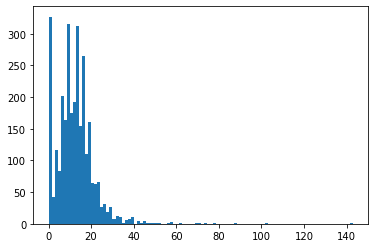

In [793]:
_ = plt.hist(paper_df['title_word_count'], bins= 100)

paper_df['title_word_count'].quantile(0.99)

7092.0

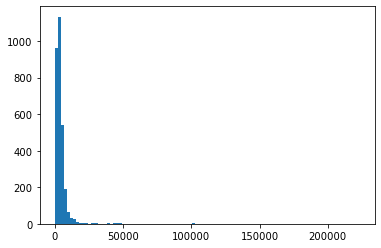

In [794]:
_ = plt.hist(paper_df['body_word_count'], bins= 100)

paper_df['body_word_count'].quantile(0.9)

452.08999999999924

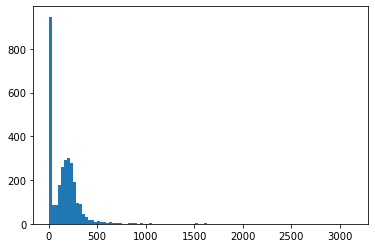

In [795]:
_ = plt.hist(paper_df['abstract_word_count'], bins= 100)

paper_df['abstract_word_count'].quantile(0.97)

In [796]:
## Drop papers with duplication

    
paper_df.drop_duplicates(['abstract', 'text'], inplace=True)

## drop paper where abstract or length is too long
# use 512 as the maximum length for T5 is 512 and BART is 1024, lose 2.5% papers
# abstract > 30 
trimmed_df = paper_df[(paper_df['abstract_word_count'] > 20) & (paper_df['abstract_word_count'] < 512)]

trimmed_df = trimmed_df[trimmed_df['title_word_count'] < 50]
# arbitry number
# trimmed_df = trimmed_df[(trimmed_df['body_word_count'] >500) &( trimmed_df['body_word_count'] < 4000)]

In [858]:
new_df = trimmed_df.copy()
new_df = new_df.reset_index(drop=True)

In [859]:
new_df.shape

(1993, 12)

### Add Topic Label From LDA classification for training data

In [860]:
from nltk.corpus import stopwords

from nltk.stem import WordNetLemmatizer

In [861]:
new_df['abstract_tokens'] = new_df['abstract'].apply(lambda x: x.split())

#### LDA specific data cleaning

In [862]:
## remove the word 'abstract'
def remove_specific_word(text):
    words = [w for w in text if w != 'abstract']
    return words

In [863]:
new_df['abstract_tokens'] =  new_df['abstract_tokens'].apply(lambda x: remove_abstract(x))

In [864]:
# remove stop words
def remove_stopwords(list_of_string):
    stop_words = set(stopwords.words('english')) 
    return [w for w in list_of_string if not w in stop_words] 
  

In [865]:
new_df['abstract_tokens'] = new_df['abstract_tokens'].apply(lambda x: remove_stopwords(x))

In [866]:
## remove very short words, like single letter

def remove_short_words(tokens, min_len):
    return [w for w in tokens if len(w)>=min_len] 


In [867]:
new_df['abstract_tokens'] = new_df['abstract_tokens'].apply(lambda x: remove_short_words(x, 2))
  

In [868]:
## lemmatize words

# define a function to lematize a list of tokens
lemmatizer = WordNetLemmatizer() # instantiate a lemmatizer

def lemmatize_tokens(tokens):
    lemmatized_tokens = [lemmatizer.lemmatize(t) for t in tokens]
    return lemmatized_tokens

In [869]:
new_df['abstract_tokens'] = new_df['abstract_tokens'].apply(lambda x: lemmatize_tokens(x)) #lemmatize words

In [870]:
# # define a function that converts a list of tokens into n-grams
# def getNGrams(tokens, n):
#     return [tokens[i : i + n] for i in range(len(tokens) - (n - 1))]

In [871]:
# new_df['abstract_2-grams'] = new_df['abstract_tokens'].apply(lambda x: getNGrams(x, 2))
# new_df.head()

In [872]:
# words = set(nltk.corpus.words.words())

In [873]:
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.feature_extraction.text import TfidfVectorizer

# vectorizer = CountVectorizer(analyzer = "word",   \
#                              tokenizer = None,    \
#                              preprocessor = None, \
#                              stop_words = 'english',   \
#                              max_features = 2000) 

# ## this makes tokens
# all_tokens = new_df['abstract_tokens'].apply(lambda x: " ".join(x))

# # all_tokens = new_df['abstract'].apply(lambda x: " ".join(x), axis = 0)
# vectorizer.fit(all_tokens)

In [874]:
# x_train = vectorizer.transform(all_tokens)

In [875]:
# x_train = x_train.toarray()

In [876]:
# # Top words in the trianing set
# word_count = pd.DataFrame({'word': vectorizer.get_feature_names(), 'count': np.asarray(x_train.sum(axis=0))})
# word_count.sort_values('count', ascending=False).set_index('word')[:30].sort_values('count', ascending=True).plot(kind='barh')


### Unigram + bigram LDA modeling

In [877]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.models import Phrases

In [878]:
LDA_data = new_df['abstract_tokens']


bigram = Phrases(LDA_data, min_count=1)

for idx in range(len(LDA_data)):
    for token in bigram[LDA_data[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            LDA_data[idx].append(token)
            

# Reformatting tokens for LDA

## this clean numbers out
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

        
# construct token list
texts = list(sent_to_words(LDA_data))

# create dictionary
dictionary = corpora.Dictionary(texts)

dict(list(dictionary.token2id.items())[0:10])

## create corpus for LDA
corpus = [dictionary.doc2bow(item) for item in texts]

In [400]:
### Search optimal cluster number

In [821]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
#         model = gensim.models.wrappers.LdaMallet(mallet_path, 
#                                                  corpus=corpus,
#                                                  num_topics=num_topics,
#                                                  id2word=id2word)
        
        
        model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                                id2word=dictionary,
                                                num_topics=num_topics,
                                                random_state=100,
                                                update_every=1,
                                                chunksize=100,
                                                passes=10,
                                                alpha='auto',
                                                per_word_topics=True)
        
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [822]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=texts, start=2, limit=40, step=6)
# Show graph

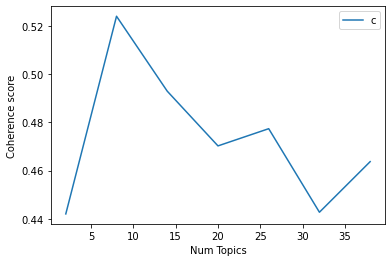

In [823]:
# Show graph 
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

## looks like 8 topic is best

In [879]:
## do LDA using 20 topics
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=dictionary,
                                            num_topics=8,
                                            random_state=100,
                                            update_every=1,
                                            chunksize=100,
                                            passes=10,
                                            alpha='auto',
                                            per_word_topics=True)

In [880]:
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.



Perplexity:  -9.030173765818004


In [881]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.5514779466317937


In [ ]:
import pyLDAvis
import pyLDAvis.gensim  
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary, R = 50)
vis

In [882]:
## show topic and top N key words
for idx, topic in lda_model.show_topics(num_topics= 50, formatted=False, num_words= 20):
    
    print('Topic: {} \nWords: {}'.format(idx, '|'.join([w[0] for w in topic])))

Topic: 0 
Words: sars|cov|virus|strain|pcr|coronavirus|sequence|mers|sample|assay|analysis|genome|positive|using|rna|gene|human|respiratory|two|viral
Topic: 1 
Words: de|la|en|le|et|al|del|el|un|covid|se|con|gc|cardiovascular|fl|chinese|pour|los|et_al|di
Topic: 2 
Words: patient|case|clinical|infection|study|hospital|acute|severe|risk|day|respiratory|symptom|group|ci|outcome|pneumonia|treatment|covid|associated|mortality
Topic: 3 
Words: de|een|van|die|het|met|bronchiolitis|bij|werd|op|und|patienten|voor|pdcov|codon|dat|om|van_de|carboxyl|jarige
Topic: 4 
Words: covid|model|data|case|number|epidemic|time|transmission|measure|outbreak|rate|spread|result|disease|contact|analysis|network|population|using|world
Topic: 5 
Words: disease|health|system|based|use|public|infectious|review|study|approach|research|information|potential|new|current|development|emerging|strategy|risk|need
Topic: 6 
Words: virus|infection|respiratory|influenza|child|study|viral|pathogen|cause|disease|control|rsv|gro

In [883]:
## assign topic to documents
topic_assignments = lda_model.get_document_topics(corpus,minimum_probability=0)

In [884]:
probabilities = [ [entry for entry in doc] for doc in topic_assignments ]

In [885]:
sort_prob = [sorted(x, key = lambda x: x[1], reverse = True) for x in probabilities]

In [886]:
## obtain highest score topic

topic_list = [x[0][0] for x in sort_prob]

In [887]:
new_df['topic_cluster_number'] = topic_list

In [888]:
new_df['topic_cluster_number'].value_counts()

7    567
5    380
0    325
2    251
4    246
6    170
1     36
3     18
Name: single_word_topic, dtype: int64

(array([325.,  36., 251.,  18., 246., 380., 170., 567.]),
 array([0.   , 0.875, 1.75 , 2.625, 3.5  , 4.375, 5.25 , 6.125, 7.   ]),
 <a list of 8 Patch objects>)

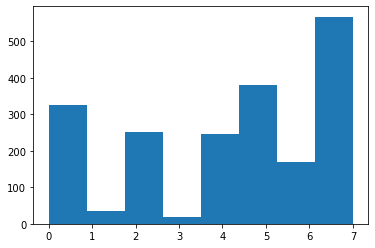

In [889]:
plt.hist(new_df['topic_cluster_number'],bins = 8)

In [904]:
new_df[new_df['single_word_topic'] == 3]['abstract']

32      abstract patiënt a is een 39-jarige vrouw met ...
168     abstract dokumentation folge 3 279 voisi~ a pa...
656     abstract dr m keuter  drs j van den hombergh 1...
693     abstract nucleoside analogues are among the mo...
885     abstract bovine viral diarrhea virus (bvdv) is...
1040    abstract die pandemie durch das coronavirus sa...
1074    abstract in twee maanden tijd werd in ons ziek...
1262    abstract this investigation was aimed to compa...
1334    abstract zusammenfassung bei lungenfunktionsst...
1471    abstract in september 2012 is een nieuw type c...
1495    abstract chikungunya virus (chikv) is an arthr...
1572    abstract ook al zijn we ons daarvan niet altij...
1637    abstract summary five tumours removed from the...
1735    abstract cystische fibrose (cf) is een ziekte ...
1814    abstract in der aktuellen covid-19-pandemie st...
1827    abstract 1 klinische pr aktijk patiënt a een 5...
1851    abstract de behandeling van chronisch zieke pa...
1941    abstra

In [99]:
## Train Test Split

In [906]:
test_df = new_df[new_df['title_word_count'] < 4].copy()

In [907]:
# set the erroreous title as empty
test_df['title'] = ''
test_df['title_word_count'] = 0

In [892]:
# train dataset
train_df = new_df.drop(test_df.index).copy()

In [893]:
train_df=train_df.reset_index(drop=True)
test_df=test_df.reset_index(drop=True)

In [894]:
test_df.shape

(111, 14)

In [895]:
train_df.shape

(1882, 14)

In [105]:
#remove articles that are not related to COVID-19 based on publish time
## WIP
# clean_df=clean_df[(clean_df['publish_time']>'2019-11-01') & (merge_final['text_body'].str.contains('nCoV|Cov|COVID|covid|SARS-CoV-2|sars-cov-2'))]
# clean_df.shape

In [897]:
train_df.to_csv(data_path/ 'cleaned_data' / 'train_dataset.csv')
test_df.to_csv(data_path/ 'cleaned_data' / 'test_dataset.csv')

In [908]:
test_df.head()

,paper_id,title,authors,affiliations,abstract,text,bibliography,raw_authors,raw_bibliography,title_word_count,abstract_word_count,body_word_count,abstract_tokens,single_word_topic
18,b9632f2268a31399f304f4a0b58471e2d2fcaab4,,"Wanbo Zhu, Kai Xie, | Hui Lu, Lei Xu, Shusheng...",Wanbo Zhu (The First Affiliated Hospital of Un...,abstract with an increasing number of coronavi...,2019-ncov shares over 79% of its genome seque...,Clinical management of severe acute respirator...,"[{'first': 'Wanbo', 'middle': [], 'last': 'Zhu...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Clinica...",0,444,1667,"[increasing, number, coronavirus, disease, 201...",2
88,0fcd3975664a5658071a8b4bc878539fd5e788bd,,"Antonio Scala, Andrea Flori, Alessandro Spelta...","Antonio Scala (CNR-ISC), Andrea Flori (Politec...",abstract we develop a minimal compartmental mo...,introduction epidemic modelling is not a new f...,"Models of foot-and-mouth disease, J Matt, Kee...","[{'first': 'Antonio', 'middle': [], 'last': 'S...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Models ...",0,206,6495,"[develop, minimal, compartmental, model, analy...",4
90,8a98cb8d707c25c75ab93abc33960cf417f03281,,"Philippe Parola, Georges Soula, Pierre Gazin, ...","Philippe Parola (AP-HM, 13015, Marseille, Fran...",abstract background: febrile travelers may pos...,millions of people from industrialized countr...,"Assessment of travellers who return home ill, ...","[{'first': 'Philippe', 'middle': [], 'last': '...","{'BIBREF1': {'ref_id': 'b1', 'title': 'Assessm...",0,255,4994,"[background:, febrile, traveler, may, pose, di...",5
156,579ba516a18b89a67eedcd6a011528c6a9232a87,,"A Menchaca, P C Dos Santos-Neto, A P Mulet, M ...","A Menchaca, P C Dos Santos-Neto, A P Mulet (In...",abstract precise genome editing of large anima...,introduction genome editing in large animals m...,"World population prospects: the 2017 revision,...","[{'first': 'A', 'middle': [], 'last': 'Menchac...","{'BIBREF0': {'ref_id': 'b0', 'title': 'World p...",0,185,5666,"[precise, genome, editing, large, animal, appl...",5
159,fe9e0a57d1c3b9481dd0f1782f02370c9f04d33b,,"B Koul, • J Singh, Bhupendra Koul, Joginder Singh","B Koul, • J Singh, Bhupendra Koul, Joginder Singh",abstract lychee (litchi chinensis sonn) is one...,origin and history lychee (litchi chinensis so...,Preventing the darkening of fresh lychees prep...,"[{'first': 'B', 'middle': [], 'last': 'Koul', ...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Prevent...",0,238,5340,"[lychee, (litchi, chinensis, sonn), one, rever...",5


## Algorithm testing

In [107]:
train_df = pd.read_csv(data_path/ 'cleaned_data' / 'train_dataset.csv')


In [ ]:

# load BART summarizer
# summarizer = pipeline(task="summarization")


In [ ]:


# summary = summarizer(clean_df['abstract'][0], min_length=50, max_length=3312)

In [13]:
## BERT
from summarizer import Summarizer

model = Summarizer()
result = model(train_df['abstract'][0], min_length=50,max_length=100)
full0 = ''.join(result)

In [14]:
pprint(full0)

''


In [10]:
#GPT2
from summarizer import Summarizer,TransformerSummarizer

GPT2_model = TransformerSummarizer(transformer_type="GPT2",transformer_model_key="gpt2-medium")
full = ''.join(GPT2_model(train_df['abstract'][0], min_length=50, max_length=100))

In [11]:
pprint(full)

''


In [ ]:
## Bart Text Summarization

#### problem:

#### BART seems working anyway
#### limitation is 1024 words(token)

In [31]:
import torch
from transformers import BartTokenizer, BartForConditionalGeneration
from transformers import pipeline

torch_device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = BartForConditionalGeneration.from_pretrained('facebook/bart-large-cnn')
tokenizer = BartTokenizer.from_pretrained('facebook/bart-large-cnn')

summarizer = pipeline(task="summarization", model=model, tokenizer=tokenizer)

In [41]:
# test size of tokens
input_ids = tokenizer.encode(train_df['text'][1], add_special_tokens=True)

## input is too long!
len(input_ids)

In [ ]:
# ' '.join(tokenizer.convert_ids_to_tokens(input_ids)) 

In [48]:
full3 = summarizer(train_df['abstract'][0], min_length=30, max_length=100)
print(full3)

[{'summary_text': 'Study investigated the longterm impact of antibiotic use policy on the rates of consumption expressed as dailydefined doses1000 patientdays of various parenteral antibiotics. It also looked at the prevalence of methicillinresistant Staphylococcus aureus MRSA and the incidence of healthcareassociated MRSA HAMRSA infection.'}]


In [ ]:
## T5

## T5 limitation is 512 tokens

In [47]:
from transformers import T5Tokenizer, T5ForConditionalGeneration, T5Config

model = T5ForConditionalGeneration.from_pretrained('t5-small')
tokenizer = T5Tokenizer.from_pretrained('t5-small')
device = torch.device('cpu')

text = train_df['abstract'][0]


preprocess_text = text.strip().replace("\n","")
t5_prepared_Text = "summarize: "+preprocess_text
print ("original text preprocessed: \n", preprocess_text)

tokenized_text = tokenizer.encode(t5_prepared_Text, return_tensors="pt").to(device)


# summmarize 
summary_ids = model.generate(tokenized_text,
                            num_beams=4,
                            no_repeat_ngram_size=2,
                            min_length=30,
                            max_length=100,
                            early_stopping=True)

output = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

print ("\n\nSummarized text: \n",output)

original text preprocessed: 
 Abstract The present study investigated the longterm impact of antibiotic use policy on the rates of consumption expressed as dailydefined doses1000 patientdays of various parenteral antibiotics and on the prevalence of methicillinresistant Staphylococcus aureus MRSA and the incidence of healthcareassociated MRSA HAMRSA infection at a tertiary care hospital from 2001 to 2009 During this time consumption of all antimicrobials for systemic use decreased by 33 This change was driven by a 44 decrease in the consumption of unrestricted antibacterials which was offset by a 42 increase in the consumption of restricted agents The trends in MRSA prevalence number of isolates1000 patientdays and HAMRSA incidence number of HAMRSAinfected persons1000 patientdays correlated with the trend in overall consumption of antimicrobials Significant positive correlations were observed between MRSA prevalence and the consumption of extendedspectrum and lactamaseresistant penicil

In [19]:
summarizer = pipeline("summarization", 
                      model="t5-base", 
                      tokenizer="t5-base", 
                      framework="tf")

summarizer(train_df['text'][0], min_length=5, max_length=20)


[{'summary_text': 'the prevalence of hamrsa and mrssa in ta'}]

In [44]:
len(train_df['text'][0].split())

2537